# Installing the Required Libraries

In [2]:
!pip install xgboost scikit-learn pandas -U

ERROR: Invalid requirement: '-'


### Downloading the Dataset

In [4]:
!wget https://raw.githubusercontent.com/Serious-bus1ness/Projekt/main/anotacijeka.tsv

--2024-05-31 12:34:24--  https://raw.githubusercontent.com/Serious-bus1ness/Projekt/main/anotacijeka.tsv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 416060 (406K) [text/plain]
Saving to: ‘anotacijeka.tsv’

anotacijeka.tsv     100%[===================>] 406.31K  --.-KB/s    in 0.06s   

2024-05-31 12:34:24 (6.18 MB/s) - ‘anotacijeka.tsv’ saved [416060/416060]



## 1. Reading Preprocessing Cleaning

In [6]:
texts = []
labels = []
with open('/content/anotacijeka.tsv') as input_file:
    for i, line in enumerate(input_file):
        line = line.strip()

        print(i, line, line.rsplit("\t"))

        text, label = line.split("\t")
        texts.append(text)
        labels.append(label)

        print(i, text, label)

Izlaz streaminga skraćen je na ovoliko posljednjih redaka: 5000.
528 S obzirom da većina aktera ima višestruke uloge, možda nije bilo na odmet birati isključivo poznate glumce.	Neutral ['S obzirom da većina aktera ima višestruke uloge, možda nije bilo na odmet birati isključivo poznate glumce.', 'Neutral']
528 S obzirom da većina aktera ima višestruke uloge, možda nije bilo na odmet birati isključivo poznate glumce. Neutral
529 U okviru ovog filma to i jeste bio slučaj, ali je to ujedno i njegov minus.	Negative ['U okviru ovog filma to i jeste bio slučaj, ali je to ujedno i njegov minus.', 'Negative']
529 U okviru ovog filma to i jeste bio slučaj, ali je to ujedno i njegov minus. Negative
530 Cloud Atlas se oslanja na činjenicu da svi znamo kako izgleda Tom Hanks ili Halle Berry.	Neutral ['Cloud Atlas se oslanja na činjenicu da svi znamo kako izgleda Tom Hanks ili Halle Berry.', 'Neutral']
530 Cloud Atlas se oslanja na činjenicu da svi znamo kako izgleda Tom Hanks ili Halle Berry. Neut

# Checking if the arrays have same length

In [7]:
len(texts),len(labels)

(3028, 3028)

# Checking if the labels are really same

In [8]:
set(labels)

{'Mixed', 'Negative', 'Neutral', 'Positive'}

In [ ]:
#nije potreban korak, sve anotacije su iste


# Lower case the labels to avoid any confusion. Skiping if labels are already in lower-case format

In [9]:
lower_cased_label = [x.lower() for x in labels]
lower_cased_label

['positive',
 'mixed',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'mixed',
 'mixed',
 'negative',
 'positive',
 'negative',
 'negative',
 'mixed',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'mixed',
 'negative',
 'positive',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'negative',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'positive',
 'mixed',
 'positive',
 'positive',
 'negative',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'positive',
 'mixed',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'neutral',
 'neutral',
 'positive',
 'positive',
 'neutral',
 'mixed',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positive',
 'positi

# Replacing the non-matching labels from the lower_cased_label variable with the label_replace_dict dictionary

In [ ]:
#ne treba ovaj korak, sve anotacije su iste

# We confirm we have only 4 labels

In [10]:
set(labels)

{'Mixed', 'Negative', 'Neutral', 'Positive'}

# 1a. just creating dataframe for more details


In [11]:
import pandas as pd

df = pd.DataFrame({"text": texts, "label": labels})


## Label distribution

In [12]:
df["label"].value_counts()

label
Neutral     1403
Positive     948
Negative     432
Mixed        245
Name: count, dtype: int64

In [13]:
df.head()

,text,label
0,"Kao jedna od franšiza koju sam volio, očito sa...",Positive
1,Obično bih volio doživjeti ovakve filmove na d...,Mixed
2,"Dakle, pogledao sam ga tek jučer nakon 3 dana ...",Neutral
3,Četiri godine nakon događaja u Jurassic World:...,Neutral
4,U međuvremenu dr. Ellie Sattler (Laura Dern – ...,Neutral


# Computing the number of instances

In [14]:
df.shape

(3028, 2)

## Since the machine learning algorithms do not work with text (pos, neg, neutral) we convert the labels to numbers using labelencoder class

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(labels)
print(le.classes_)
labels = le.transform(labels)
print(labels)


['Mixed' 'Negative' 'Neutral' 'Positive']
[3 0 2 ... 2 2 1]


In [16]:
set(labels)

{0, 1, 2, 3}

# 2. Training -  Baseline - Round 0

## Train test split

# Spliting the data into train and test sets

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
texts_train, texts_test, labels_train, labels_test = train_test_split(
    texts, labels, test_size=0.2, random_state=42)

In [19]:
"Size of train:",len(texts_train), "test set", len(texts_test)

('Size of train:', 2422, 'test set', 606)

# Converting text data into numerical features using TF-IDF

In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [21]:
vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(texts_train)
X_test = vectorizer.transform(texts_test)


In [22]:
import xgboost as xgb

In [23]:
# Train the XGBoost model
model = xgb.XGBClassifier(n_jobs=-1)
model.fit(X_train, labels_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [24]:
# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluating the model performance


In [25]:
from sklearn.metrics import accuracy_score, f1_score

In [26]:
accuracy = accuracy_score(labels_test, predictions)
print("Accuracy: {:.2f}%".format(accuracy * 100))
f1 = f1_score(labels_test, predictions, average='macro')
print("F1-Score: {:.2f}%".format(f1 * 100))


Accuracy: 53.47%
F1-Score: 41.51%


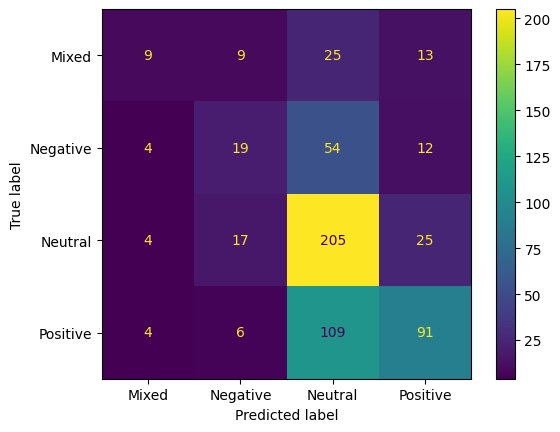

In [27]:
%matplotlib inline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix( labels_test, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,

                              display_labels=le.classes_)

disp.plot()

## Analysing the errors

In [28]:
# Create a DataFrame with text, predictions and true labels
data = {'Text':texts_test, 'Actual-Label': labels_test, 'Predicted-Label': predictions}
df_errors = pd.DataFrame(data)
print(len(df_errors))
df_errors[df_errors["Actual-Label"] != df_errors['Predicted-Label']]
# here you can see the sameples in the test set that are wrongly predicted

606


,Text,Actual-Label,Predicted-Label
1,Jedino zbog čega sam požalio što nisam pogleda...,1,2
2,Spielberg je stvorio zapanjujući svijet pun zn...,3,2
3,Koji su reprizirali svoje originalne uloge i z...,3,2
8,"Kao i obično, film Marvel bi definitivno bio o...",1,2
11,"Ali naslućujem da će Aquaman, kao zaseban film...",3,2
...,...,...,...
599,Osjećalo se kao da su mnogi dijelovi prisiljen...,1,2
600,Spielberg je stvorio zapanjujući svijet pun po...,3,2
601,"Nešto na šta se rijetko nailazi, ‘Edge of Tomm...",3,2
602,"Scott Lang kojeg igra, konačno jedan, izgledom...",3,2


# Adding stop words for Croatian

In [29]:
import requests
raw_url = "https://raw.githubusercontent.com/stopwords-iso/stopwords-hr/master/stopwords-hr.txt"
response = requests.get(raw_url)

if response.status_code == 200:
  # Read the text content
  text_data = response.text

  # Split the text into lines by default
  data_list = text_data.splitlines()
data_list

['a',
 'ako',
 'ali',
 'bi',
 'bih',
 'bila',
 'bili',
 'bilo',
 'bio',
 'bismo',
 'biste',
 'biti',
 'bumo',
 'da',
 'do',
 'duž',
 'ga',
 'hoće',
 'hoćemo',
 'hoćete',
 'hoćeš',
 'hoću',
 'i',
 'iako',
 'ih',
 'ili',
 'iz',
 'ja',
 'je',
 'jedna',
 'jedne',
 'jedno',
 'jer',
 'jesam',
 'jesi',
 'jesmo',
 'jest',
 'jeste',
 'jesu',
 'jim',
 'joj',
 'još',
 'ju',
 'kada',
 'kako',
 'kao',
 'koja',
 'koje',
 'koji',
 'kojima',
 'koju',
 'kroz',
 'li',
 'me',
 'mene',
 'meni',
 'mi',
 'mimo',
 'moj',
 'moja',
 'moje',
 'mu',
 'na',
 'nad',
 'nakon',
 'nam',
 'nama',
 'nas',
 'naš',
 'naša',
 'naše',
 'našeg',
 'ne',
 'nego',
 'neka',
 'neki',
 'nekog',
 'neku',
 'nema',
 'netko',
 'neće',
 'nećemo',
 'nećete',
 'nećeš',
 'neću',
 'nešto',
 'ni',
 'nije',
 'nikoga',
 'nikoje',
 'nikoju',
 'nisam',
 'nisi',
 'nismo',
 'niste',
 'nisu',
 'njega',
 'njegov',
 'njegova',
 'njegovo',
 'njemu',
 'njezin',
 'njezina',
 'njezino',
 'njih',
 'njihov',
 'njihova',
 'njihovo',
 'njim',
 'njima',
 'n

# Lemmatising the words for Croatian

In [30]:
!pip install spacy

In [31]:
!python -m spacy download hr_core_news_md

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.5/67.5 MB 6.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('hr_core_news_md')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [32]:
import spacy
from spacy.lang.hr.examples import sentences

nlp = spacy.load("hr_core_news_md",)
doc = nlp(sentences[0])
print(doc.text)
for token in doc:
    print(token.text, token.pos_, token.dep_)

Ovo je rečenica.
Ovo DET nsubj
je AUX cop
rečenica NOUN ROOT
. PUNCT punct


In [33]:
lemmas = " ".join([token.lemma_ for token in doc])
lemmas

'ovaj biti rečenica .'

# get confusion matrix

Error analysis